# Teisės aktų registro duomenų problemos

Pagrindinė problema su teisės aktų registro duomenimis - Seimo įstatymams, įregistruotiems iki 2014 metų, trūksta įstatymo įsigaliojimo, nustojimo galioti bei kitų datų. Nuėjus į dokumento puslapį pačiame e-tar, visos reikalingos datos matosi.


In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import HTML


In [2]:
dataset_url = "https://get.data.gov.lt/datasets/gov/lrsk/teises_aktai/Dokumentas/:format/csv"


In [3]:
df = pd.read_csv(dataset_url, low_memory=False)


In [4]:
df_seimas = df[
    (df["priemusi_inst"] == "Lietuvos Respublikos Seimas")
    & (df["rusis"] == "Įstatymas")
    & (df["registracija"] >= "1990-01-01")
]

In [5]:
columns = [
    "nuoroda",
    "galioj_busena",
    "tar_kodas",
    "registracija",
    "priimtas",
    "patvirtinta",
    "isigalioja",
    "isigalioja_po_salygu",
    "negalioja",
    "negalioja_po_salygu",
]
df_seimas = df_seimas[columns]

In [6]:
df_seimas["nuoroda"] = df_seimas["nuoroda"].apply(lambda x: f'<a href="{x}" target="_blank">{x}</a>')


In [7]:
df_missing_dates = df_seimas[
    df_seimas["isigalioja"].isnull() & df_seimas["isigalioja_po_salygu"].isnull()
]
display(HTML(df_missing_dates.sample(10).to_html(escape=False, index=False)))

nuoroda,galioj_busena,tar_kodas,registracija,priimtas,patvirtinta,isigalioja,isigalioja_po_salygu,negalioja,negalioja_po_salygu
https://e-tar.lt/portal/lt/legalAct/TAR.41A6FD9F85C3,galioja,1021010ISTA00IX-759,2002-03-07,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.25726E56F3ED,galioja,1111010ISTA0XI-1441,2011-06-09,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.5E093B9CF578,negalioja,0931010ISTA000I-296,1993-10-28,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.7919F56F4311,galioja,1001010ISTAIII-2027,2000-10-12,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.4688980C7C83,galioja,1001010ISTAIII-2036,2000-10-12,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.5F674121F270,galioja,1041010ISTA0IX-2458,2004-09-28,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.41490157DAB9,galioja,0961010ISTA00I-1557,1996-09-25,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.360031558A9A,galioja,1061010ISTA000X-605,2006-05-11,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.7F4FFC21ADD2,galioja,1031010ISTA0IX-1716,2003-07-04,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.70214821BA57,galioja,1061010ISTA000X-797,2006-07-19,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='registracija', ylabel='count'>

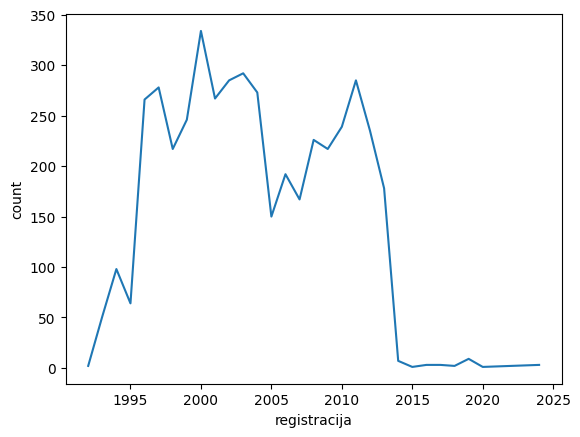

In [8]:
missing_dates_counts = pd.to_datetime(df_missing_dates["registracija"]).dt.year.value_counts().reset_index()
sns.lineplot(x="registracija", y="count", data=missing_dates_counts);
